# Problem 3

In [ ]:
# problem 3.1

The reactor in the problem is examined in an IMRCF. 
$$ A(g)+B(g) \rightleftharpoons C(g) + D(g)$$
D selectively permeates through the membrane at the rate  $$R_D = k_d \cdot CD $$
The following code is adapted from the provided IMRCF codes on canvas. 
- For Total Concentration (y-axis) vs Catalyst Mass (x-axis) $$ C_j = \frac{F_j}{F}*C_0 $$
- The total molar flow rate is adapted from the provided code

In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.stats import linregress
import pandas as pd

In [4]:
# Provided by Professor Eagan
def diff(t,U):
    
    # Specify identity of each U for clarity
    FA = U[0] # volumetric feed of CO
    FB = U[1] # volumetric feed of H2O
    FC = U[2] # volumetric feed of CO2
    FD = U[3] # volumetric feed of H2
    
    # Perform calculations
    F = FA + FB + FC + FD
    C = C0
    
    # Concentration 
    CA = FA/F*C # CO
    CB = FB/F*C # H2O
    CC = FC/F*C # CO2
    CD = FD/F*C # H2
    QC = CD*CC/(CA*CB)
    r = kf*(CA*CB)*(1-QC/KC)  # technically written as -rA
    
    # Define derivatives
    dFA = -r # flip sign forwards 
    dFB = -r
    dFC = r # retain negative for backwards 
    dFD = r - kH2*CD # accounting for permeations
    
    #Populate derivatives array
    dU=np.zeros(len(U))
    dU[0] = dFA
    dU[1] = dFB
    dU[2] = dFC
    dU[3] = dFD
    
    # Reorganize list to fit required dimensions 
    dU = np.array(dU).tolist()
    
    return dU

In [5]:
# Specifications
P0 = 101.325 #kPa
R = 8.314  #kPa L / mol K
kf = 1.37    #L^2/mol kg min
KC = 1.44  #mol/L # EQUILIBRIUM constant
kH2 = 0.1   #L/kg min^-1 
# Initial Concentration
C0 = 0.4   #mol/dm^3
FA0 = 10*C0/2   #dm^3/min
# DOUBLE THE FLOW RATE HERE
# FA0 = 2*FA0
FB0 = FA0
# Set initial conditions
U0 = [FA0, FB0, 0,0]

# Determine integration limits
tlim = (0,100)
tlist = np.linspace(tlim[0],tlim[1],num=100) 



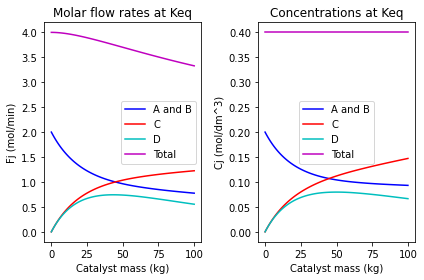

In [7]:
# Integrate
solution = solve_ivp(diff,tlim,U0,t_eval=tlist)

# Obtain ouputs and times
U = solution.y.T
W = solution.t
FA = U[:,0]
FB = U[:,1]
FC = U[:,2]
FD = U[:,3]
FT = FA + FB + FC + FD

CA = FA/FT*C0
CB = FB/FT*C0
CC = FC/FT*C0
CD = FD/FT*C0
CT = FT/FT*C0

# Plot data
fig = plt.figure()
ax1 = plt.subplot(121)
# Since the reactants are equimolar entering at the same concentration
# it is reasonable to identify an overlap in the reactant A and B lines
ax1.plot(W,FA,'b')
# ax1.plot(W,FB,'g')
ax1.plot(W,FC,"r")
ax1.plot(W,FD,'c')
ax1.plot(W,FT, "m")
ax1.legend(['A and B','C','D','Total'])
ax1.set_xlabel('Catalyst mass (kg)')
ax1.set_ylabel('Fj (mol/min)')
ax1.set_title('Molar flow rates at Keq')

ax2 = plt.subplot(122)
ax2.plot(W,CA,'b')
# ax2.plot(W,CB,'g')
ax2.plot(W,CC,"r")
ax2.plot(W,CD,'c')
ax2.plot(W,CT,'m')
ax2.legend(['A and B','C','D','Total'])
ax2.set_xlabel('Catalyst mass (kg)')
ax2.set_ylabel('Cj (mol/dm^3)')
ax2.set_title('Concentrations at Keq')


fig.tight_layout()
plt.show()

# Problem 4

In [320]:
from scipy.stats import linregress
import math

In [321]:
# Problem 4.1
t = np.array([0,5,9,15,22,30,40,60])
CA = np.array([2,1.6,1.35,1.1,0.87,0.70,0.53,0.35])

deltat = np.diff(t)
deltaC = np.diff(CA)
negCA_t = np.multiply(deltaC, -1)/deltat
nat_lgCA = np.log(CA)
x_axis = np.delete(nat_lgCA,0) # omit first index
y_axis = np.log(negCA_t)

slope, intercept, r_value, p_value, std_err = linregress(x_axis, nat_negCA_t)
print("n is {:.5f} and therefore the reaction order is".format(slope), math.ceil(slope))


n is 1.42093 and therefore the reaction order is 2


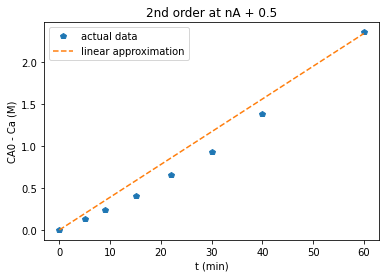

y1 = 0.03902x + -0.12075
R^2 =0.993


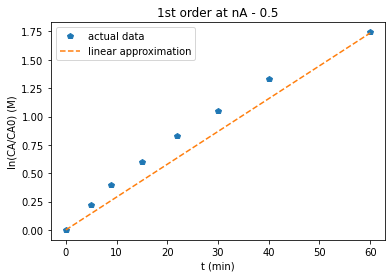

y2 = 0.02894x + 0.11625
R^2 = 0.991


In [322]:
# Problem 4.2

CA0 = CA[0] # mol/dm^3
x_axis = t
y_axis = 1/CA - 1/CA0

# Second Order
nA_pos = round(slope + 0.5)
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(x_axis, y_axis,"p")
slope1, intercept1, r1_value, p1_value, std_err1 = linregress(x_axis, y_axis)
ax1.plot(x_axis, slope1*x_axis,'--')
ax1.legend(["actual data","linear approximation"])
ax1.set_xlabel('t (min)')
ax1.set_ylabel('CA0 - Ca (M)')
ax1.set_title('2nd order at nA + 0.5')

plt.show()
print("y1 = {:.5f}x + {:.5f}".format(slope1, intercept1))
print("R^2 ={:.3f}".format(r1_value))

# First Order
nA_neg = round(slope)
ax2 = plt.subplot(111)
y_axis = np.log(CA0/CA)
ax2.plot(x_axis, y_axis,"p")
slope2, intercept2, r2_value, p2_value, std_err2 = linregress(x_axis, y_axis)
ax2.plot(x_axis, x_axis*slope2, '--')
ax2.legend(["actual data","linear approximation"])
ax2.set_xlabel('t (min)')
ax2.set_ylabel('ln(CA/CA0) (M)')
ax2.set_title('1st order at nA - 0.5')

plt.show()
print("y2 = {:.5f}x + {:.5f}".format(slope2, intercept2))
print("R^2 = {:.3f}".format(r2_value))


In [323]:
# Problem 4.3
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

In [324]:
# Model 
def model(x,*parameters):
    
    # Indepdendent variables
    CA = x
    ndtps = len(CA)
    
    # Parameters to be fit
    k = parameters[0]
    nA = parameters[1]
    
    # Calculate output value for each data point based on a model
    time_model = np.zeros(ndpts)
    for i in range(ndpts):
        time_model[i] = (-1/k)*(((CA[i]**(1-nA))/(1-nA))-(2**(1-nA))/(1-nA))  # Manually write the rate expression
    return time_model

In [325]:
# Data ()
# see line 186 in Problem 4.1
ndpts = len(t)

# Parameter Guess
k_g = 0.0390
na_g = slope
guess = ([k_g, na_g])
npars = len(guess)

In [326]:
# Regressions
xvars = CA
popt,pcov = curve_fit(model,xvars,t,guess,method='lm')

# Confidence intervals
alpha = 0.05 # 95% confidence interval
dof = max(0,ndpts-npars) # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

ci = np.zeros([npars,2])
for i,p,var in zip(range(ndpts),popt,np.diag(pcov)):
    sigma = var**0.5
    ci[i,:] = [p-sigma*tval,p+sigma*tval]
ci_width = ci[:,1]-ci[:,0]

# Create output dataframe
param_names = ['k','nA']
k, nA = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_width/2
soln['95% CI Half Width Rel %'] = ci_width/2/popt*100

# Generate matrix containing simulated rates and calculate the sum of squared residuals (ssr)
time_predict = np.zeros(ndpts)
ssr = 0
for i in range(ndpts):
    time_predict[i]=(-1/k)*(((CA[i]**(1-nA))/(1-nA))-(2**(1-nA))/(1-nA))
    sqr_resid = (time_predict[i]-t[i])**2
    ssr = ssr + sqr_resid
print('SSR = ' + "{:.3e}".format(ssr))

pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

SSR = 4.978e-01

     Value  95% CI Half Width  95% CI Half Width Rel %
k   0.033              0.000                    0.956
nA  1.515              0.038                    2.487 



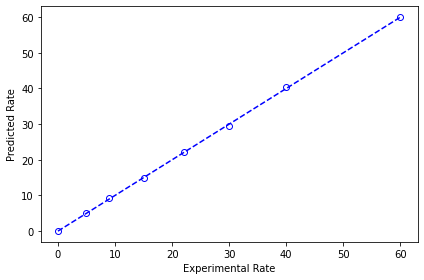

In [327]:
## Parity plots

# Parity line
x_parity = [min([min(t),min(time_predict)]),max([max(t),max(time_predict)])]
y_parity = [min([min(t),min(time_predict)]),max([max(t),max(time_predict)])]
    
# Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(t,time_predict,'ob',mfc='none')
ax1.plot(x_parity,y_parity,'--b')
ax1.set_xlabel('Experimental Rate')
ax1.set_ylabel('Predicted Rate')

fig.tight_layout()

plt.show()

In [328]:
# Problem 4.4
CA0 = np.arange(1,4.5,0.5,dtype = "float")
rc = np.array([0.063,0.114,0.182, 0.264,0.353,0.419, 0.528])
neg_rA = np.multiply(rc,0.5)
nat_rA = np.log(neg_rA)
nat_CA0 = np.log(CA0)

In [329]:
x_axis = nat_CA0
y_axis = nat_rA
slope4, intercept4, r4_value, p4_value, std_err4 = linregress(x_axis, y_axis)
print("nA is {:.4f}".format(slope4))
print("k is {:.4f}".format(np.exp(intercept4)))

nA is 1.5433
k is 0.0313
